In [1]:
import numpy as np
print(np.__version__)


1.23.4


In [2]:
# AutoKeras classification model
import autokeras as ak


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, matthews_corrcoef, roc_curve, auc
import autokeras as ak
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC


In [4]:
# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)

    
    tp = confusion[1, 1]
    tn = confusion[0, 0]
    fp = confusion[0, 1]
    fn = confusion[1, 0]
    
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

    # Calculate other performance metrics here (e.g., recall, precision, MCC)
    
    #return confusion
    precision = tp / (tp + fp)  # Precision
    recall = tp / (tp + fn)  # Recall
    fpr = fp / (fp + tn)  # False Positive Rate
    g_score = 2 * (recall * (1 - fpr)) / (recall + (1 - fpr))  # G-Score
    f1_score = 2 * (precision * recall) / (precision + recall)  # F1-Score
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # MCC

    return confusion, precision,recall, fpr, g_score,f1_score, mcc


In [5]:
# Initialize classifiers
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [6]:
#Optional an other dataset.
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [8]:
#Optional: load dataset from a csv file
# Specify the file path to your CSV file
file_path = 'datasets/Ant5.csv'

# Read the CSV file into a DataFrame
myData = pd.read_csv(file_path)

# Create X with all columns except the first and last columns
X = myData.iloc[:, 1:-1]  # Select all rows, columns from the second to the second-to-last

# Set the last column values to 0 if they are False and 1 otherwise
X.iloc[:, -1] = X.iloc[:, -1].astype(int)

# Now, 'X' contains all columns except the first and last one, and the last column is 0 or 1

# Create y with the last column (target variable)
y = myData.iloc[:, -1]  # Select all rows and the last column


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\ProgramData\miniconda3\envs\pythonCYBR520\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


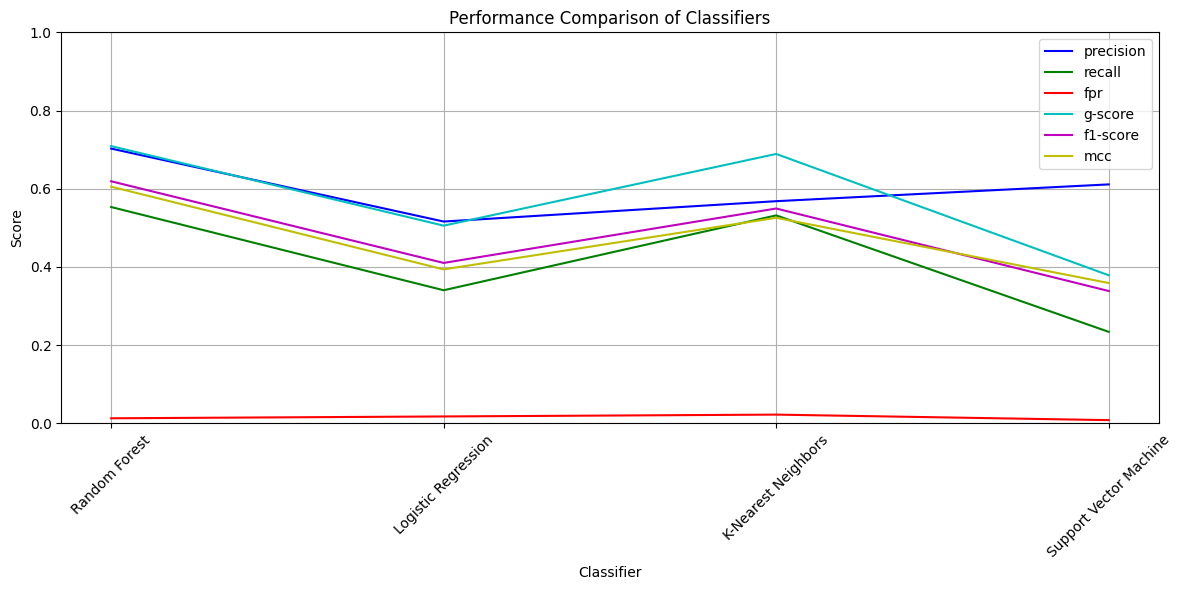

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize dictionaries to store metrics
metrics_dict = {
    'Classifier': [],
    'Metric': [],
    'Score': [],
    'Color': []
}

# Define a list of distinct colors for metrics
colors = ['b', 'g', 'r', 'c', 'm','y']

# Loop through each classifier
for color, (model_name, model) in zip(colors, models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Extract the desired metrics in the specified order
    metrics_order = ['precision', 'recall', 'fpr', 'g-score','f1-score', 'mcc']

    for metric in metrics_order:
        confusion = confusion_matrix(y_test, y_pred)
        if metric == 'precision':
            precision = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
            metrics_dict['Classifier'].append(model_name)
            metrics_dict['Metric'].append(metric)
            metrics_dict['Score'].append(precision)
            metrics_dict['Color'].append(color)
        elif metric == 'fpr':
            
            fpr = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
            metrics_dict['Classifier'].append(model_name)
            metrics_dict['Metric'].append(metric)
            metrics_dict['Score'].append(fpr)
            metrics_dict['Color'].append(color)
        elif metric == 'recall':
            #confusion = confusion_matrix(y_test, y_pred)
            recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
            metrics_dict['Classifier'].append(model_name)
            metrics_dict['Metric'].append(metric)
            metrics_dict['Score'].append(recall)
            metrics_dict['Color'].append(color)
            
        elif metric == 'g-score':
            g_score = 2 * (recall * (1 - fpr)) / (recall + (1 - fpr))
            metrics_dict['Classifier'].append(model_name)
            metrics_dict['Metric'].append('g-score')
            metrics_dict['Score'].append(g_score)
            metrics_dict['Color'].append(color)
            
        elif metric == 'f1-score':
            f1_score = 2 * (precision * recall) / (precision + recall)  # F1-Score
            metrics_dict['Classifier'].append(model_name)
            metrics_dict['Metric'].append('f1-score')
            metrics_dict['Score'].append(f1_score)
            metrics_dict['Color'].append(color)
        else:
            # Calculate MCC (Matthews Correlation Coefficient) directly
            mcc = matthews_corrcoef(y_test, y_pred)
            metrics_dict['Classifier'].append(model_name)
            metrics_dict['Metric'].append(metric)
            metrics_dict['Score'].append(mcc)
            metrics_dict['Color'].append(color)

    

# Create a line chart to compare the metrics
metrics_df = pd.DataFrame(metrics_dict)
plt.figure(figsize=(12, 6))

# Get unique metrics and colors
unique_metrics = metrics_df['Metric'].unique()

for metric, color in zip(unique_metrics, colors):
    metric_data = metrics_df[metrics_df['Metric'] == metric]
    plt.plot(metric_data['Classifier'], metric_data['Score'], label=metric, color=color)

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Performance Comparison of Classifiers')
plt.ylim(0, 1)  # Set the y-axis limits to 0-1
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# AutoKeras classification model
auto_keras_model = ak.StructuredDataClassifier(max_trials=10)  # Adjust max_trials as needed
auto_keras_model.fit(X_train, y_train, epochs=10)  # Adjust the number of epochs as needed
# This will become vry handy to make real time predictions.
auto_keras_predictions = auto_keras_model.predict(X_test)



Reloading Tuner from .\structured_data_classifier\tuner0.json


Epoch 1/10

113/113 [==============================] - 2s 3ms/step - loss: 0.1821 - accuracy: 0.9473
Epoch 2/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9587
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9610
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9640
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.9618
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.9629
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9626
Epoch 8/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9618
Epoch 9/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0806 - accuracy: 0.9652
Epoch 10/10
113/113 [=============

INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


29/29 [==============================] - 0s 2ms/step


In [15]:
# Calculate performance metrics for AutoKeras model
auto_keras_predictions = auto_keras_predictions.astype(int)  # Cast predictions to integers
confusion_ak,  precision_ak, recall_ak,fpr_ak, g_mean_ak, f1_ak, mcc_ak = calculate_metrics(y_test, auto_keras_predictions)
auto_keras_metrics = {
    'Confusion Matrix': confusion_ak,
    'Recall': recall_ak,
    'Precision': precision_ak,
    'FPR': fpr_ak,
    'MCC': mcc_ak,
    'F1 Score': f1_ak,
    'G-score': g_mean_ak,
}


True Positives (TP): 12
True Negatives (TN): 842
False Positives (FP): 8
False Negatives (FN): 35


In [16]:
print("Metrics for AutoKeras Model:")
for metric_name, metric_value in auto_keras_metrics.items():
        print(f"{metric_name}:")
        print(metric_value)
        #print("\n")

Metrics for AutoKeras Model:
Confusion Matrix:
[[842   8]
 [ 35  12]]
Recall:
0.2553191489361702
Precision:
0.6
FPR:
0.009411764705882352
MCC:
0.37112069041940315
F1 Score:
0.3582089552238805
G-score:
0.4059950978422469


In [17]:
auto_keras_metrics

{'Confusion Matrix': array([[842,   8],
        [ 35,  12]], dtype=int64),
 'Recall': 0.2553191489361702,
 'Precision': 0.6,
 'FPR': 0.009411764705882352,
 'MCC': 0.37112069041940315,
 'F1 Score': 0.3582089552238805,
 'G-score': 0.4059950978422469}

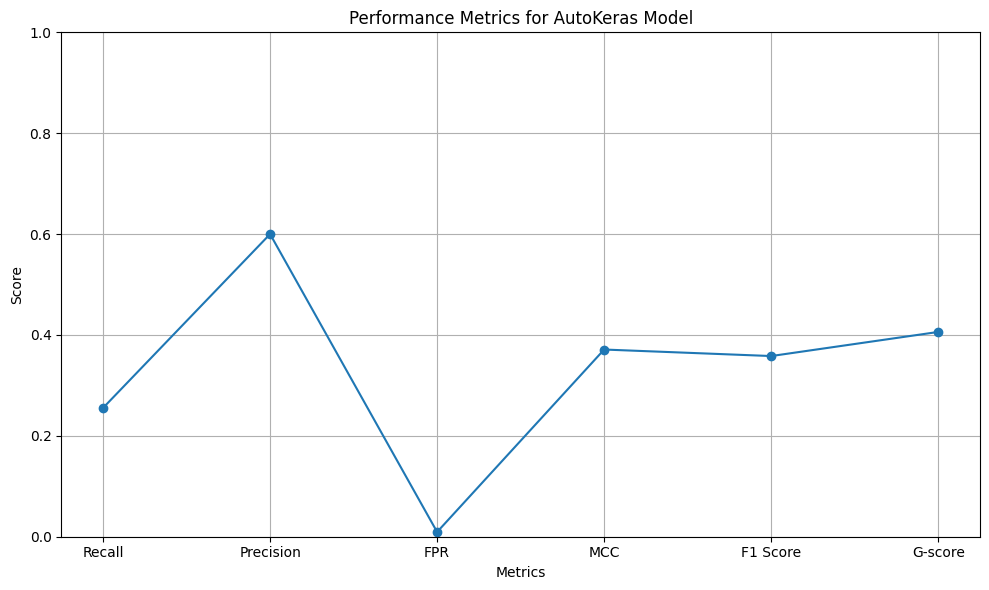

In [18]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Recall', 'Precision', 'FPR', 'MCC', 'F1 Score', 'G-score']
values = [auto_keras_metrics[metric] for metric in metrics]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics for AutoKeras Model')
plt.ylim(0, 1)  # Set the y-axis limits to 0-1
plt.grid(True)
plt.tight_layout()
plt.show()
